In [870]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [871]:
data.head(5)

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [872]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [873]:
X = data.values[:, :2].T
y = data.values[:, 2:].T
theta = np.zeros((X.shape[0]+1, 1))
X = np.concatenate([np.ones([1, X.shape[1]]), X])
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))
    

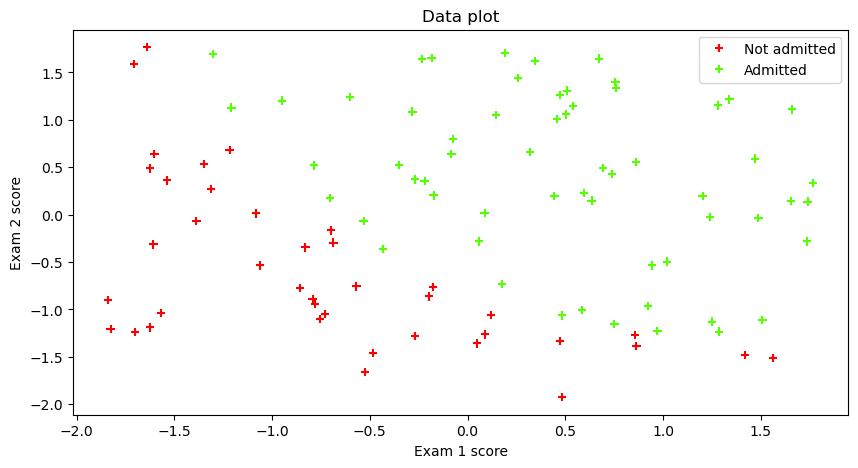

In [874]:
plt.figure(figsize=[10,5])
s = plt.scatter(X[1,:],X[2,:],c = y,marker="+",cmap='prism')
plt.title('Data plot')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(s.legend_elements()[0],["Not admitted","Admitted"])
plt.show()

In [875]:
def sig(t):
    return 1.0/(1.0+np.exp(-t))

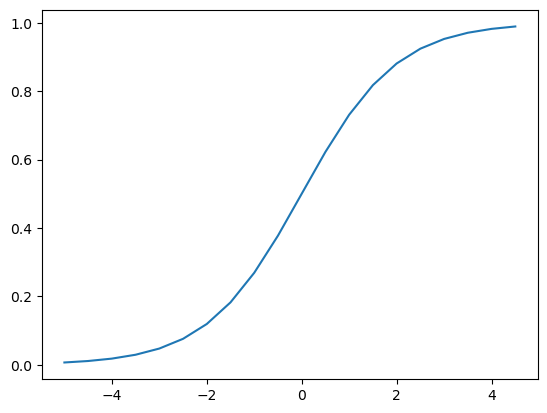

In [876]:
x_plot = np.arange(-5,5,0.5)
y_plot = sig(x_plot)
plt.plot(x_plot,y_plot)
plt.show()

In [877]:
def cost(theta, X, y):
    h = sig(theta.T @ X)
    J = ((-y*np.log(h))-((1-y)*np.log(1-h))).sum() / (X.shape[1])
    return J

theta = np.zeros((X.shape[0], 1))
print(f'cost = {cost(theta, X, y)}')



cost = 0.6931471805599453


In [878]:
def simple_gradient(theta, X, y, alpha, it):
    # it - number of iterations
    cost_sum = []
    for i in range(it):
        h_y = sig(theta.T @ X) - y
        for j in range(X.shape[0]):
            h_yxX = h_y @ X[j,:].T
            theta[j,:] = theta[j,:] - alpha * h_yxX.T / X.shape[1]

        cost_sum.append([cost(theta, X, y)])
    
    return theta, cost_sum

 
theta, cost_sum = simple_gradient(theta, X, y, 1, 150)
print("Theta: \n",theta,'\nCost: \n',cost_sum[-1])

Theta: 
 [[1.41957362]
 [3.35941597]
 [3.11271333]] 
Cost: 
 [0.20640714304449775]


In [879]:
y_true = data.values[:, 2:].astype(int).flatten()
y_pred = ((sig(theta.T @ X))).flatten()

TP = sum([1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] >= 0.5])
FP = sum([1 for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] >= 0.5])
TN = sum([1 for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] < 0.5])
FN = sum([1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] < 0.5])


print("True positives (TP):", TP)
print("False positives (FP):", FP)
print("True negatives (TN):", TN)
print("False negatives (FN):", FN)

accuracy = (TP + TN) / (TP+FP+TN+FN)
print("Accuracy = ", accuracy*100,"%")


True positives (TP): 55
False positives (FP): 6
True negatives (TN): 34
False negatives (FN): 5
Accuracy =  89.0 %


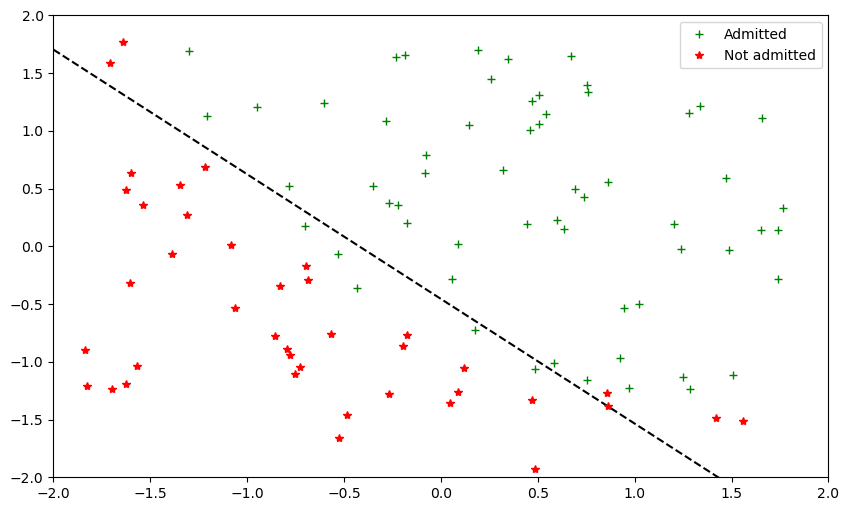

In [880]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure(figsize=(10,6))
plt.plot(x1, x2,'k--')
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
s = plt.plot(X1_1, X2_1, '+',color = 'green',label="Admitted")
n = plt.plot(X1_0, X2_0,'*',color = 'red',label = "Not admitted")
plt.ylim([-2, 2])
plt.xlim([-2, 2])
plt.legend(loc="upper right")
plt.show()

In [881]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

print("LogisticRegression Accuracy %.3f" %metrics.accuracy_score(Y_test, Y_predict))

LogisticRegression Accuracy 0.911


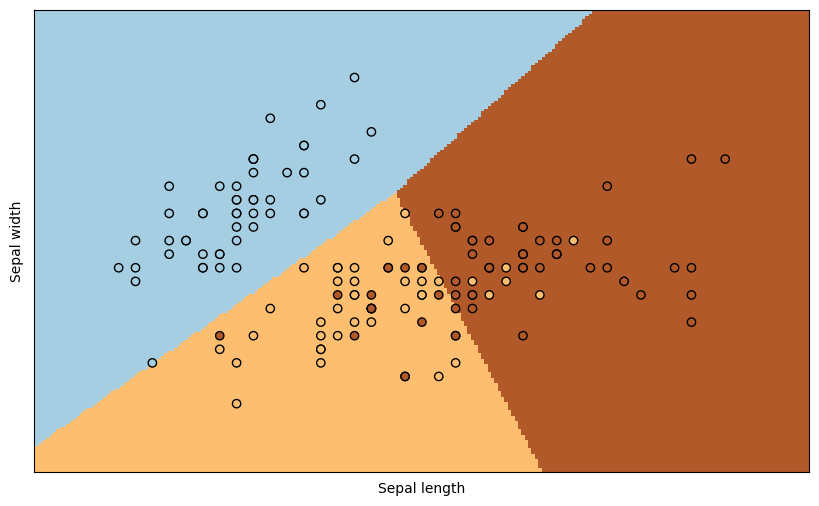

In [882]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

In [883]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
# Predict probabilities
probs_y=lr.predict_proba(X_test)
### Print results 
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(Y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2          | 2          | 0.0        | 0.08          | 0.92      
0          | 0          | 0.86       | 0.12          | 0.01      
1          | 1          | 0.0        | 0.55          | 0.45      
2          | 2          | 0.0        | 0.39          | 0.61      
2          | 2          | 0.0        | 0.35          | 0.65      
0          | 0          | 0.85       | 0.11          | 0.04      
0          | 0          | 0.93       | 0.03          | 0.04      
0          | 0          | 0.82       | 0.17          | 0.0       
1          | 1          | 0.0        | 0.75          | 0.25      
2          | 2          | 0.0        | 0.37          | 0.63      
0          | 0          | 0.86       | 0.13          | 0.02      
2          | 2          | 0.0        | 0.3           | 0.7       
1          | 1          | 0.01       | 0.88          | 0.11      
0       

In [884]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 12  1]
 [ 0  3 13]]


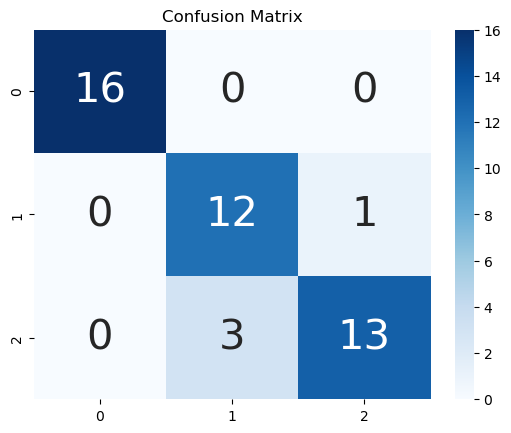

In [885]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [886]:
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Add noisy features 
random_state = np.random.RandomState(0)
n_samples, n_features = X_train.shape
X = np.c_[X_train, random_state.randn(n_samples, 200 * n_features)]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, Y_train).decision_function(X_test)

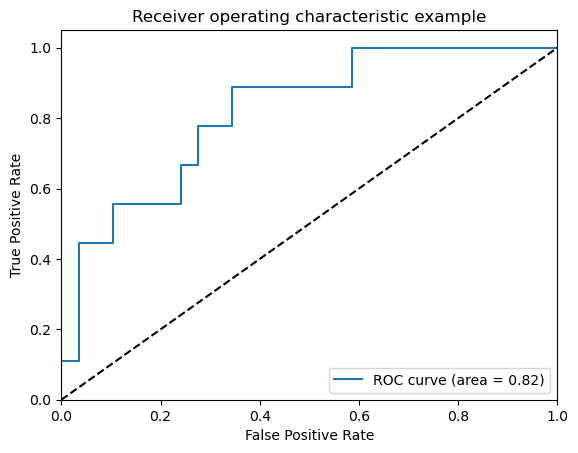

In [888]:
# Import some data to play with
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.253,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
